## Just some basic graphics for Hawaaii COVID-19<br>

## 8/1 - 8/3 data is borked
https://www.staradvertiser.com/2020/08/03/breaking-news/hawaii-tallies-record-207-new-coronavirus-cases-after-missing-data-over-weekend-deflated-counts/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from string import Template

In [2]:
df = pd.read_csv("data-kDl1L.csv",parse_dates=True)

In [3]:
df["Date"] = pd.to_datetime(df["Date"],infer_datetime_format=True)

In [4]:
df.set_index("Date",inplace=True)

In [5]:
df.index

DatetimeIndex(['2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15',
               ...
               '2020-10-04', '2020-10-05', '2020-10-06', '2020-10-07',
               '2020-10-08', '2020-10-09', '2020-10-10', '2020-10-11',
               '2020-10-12', '2020-10-13'],
              dtype='datetime64[ns]', name='Date', length=222, freq=None)

In [7]:
df['Statewide total'].rolling(7).mean()['2020-9-24']

96.85714285714286

In [6]:
df.tail(7).describe()

,Statewide total,Oahu,Hawaii island,Maui,Kauai,Molokai,Outside Hawaii
count,7.000000,7.000000,7.000000,7.000000,7.0,7.0,7.000000
mean,96.714286,75.857143,19.857143,0.571429,0.0,0.0,0.428571
std,32.612443,22.319114,11.922368,0.786796,0.0,0.0,0.786796
min,52.000000,41.000000,10.000000,0.000000,0.0,0.0,0.000000
25%,78.000000,63.000000,14.000000,0.000000,0.0,0.0,0.000000
50%,101.000000,79.000000,14.000000,0.000000,0.0,0.0,0.000000
75%,106.500000,88.000000,21.000000,1.000000,0.0,0.0,0.500000
max,155.000000,109.000000,45.000000,2.000000,0.0,0.0,2.000000


In [7]:
statsHtml = df[['Statewide total','Oahu','Hawaii island','Maui','Kauai','Outside Hawaii']].tail(7).describe().to_html(classes="mystyle",float_format='{:10.1f}'.format)
recsHtml = df[['Statewide total','Oahu','Hawaii island','Maui','Kauai','Outside Hawaii']].tail(7).to_html(classes="mystyle",float_format='{:10.1f}'.format)

with open('publish/templates/index.html') as f:
    s = Template(f.read())
    
print(s.safe_substitute(stats=statsHtml,recs=recsHtml),file=open('publish/index.html','w'))

In [8]:
df.tail(7)

,Statewide total,Oahu,Hawaii island,Maui,Kauai,Molokai,Outside Hawaii
Date,,,,,,,
2020-10-05,52,41,10,1,0,0,0
2020-10-06,83,67,14,2,0,0,0
2020-10-07,110,90,18,0,0,0,2
2020-10-08,101,86,14,1,0,0,0
2020-10-09,155,109,45,0,0,0,1
2020-10-10,73,59,14,0,0,0,0
2020-10-11,103,79,24,0,0,0,0


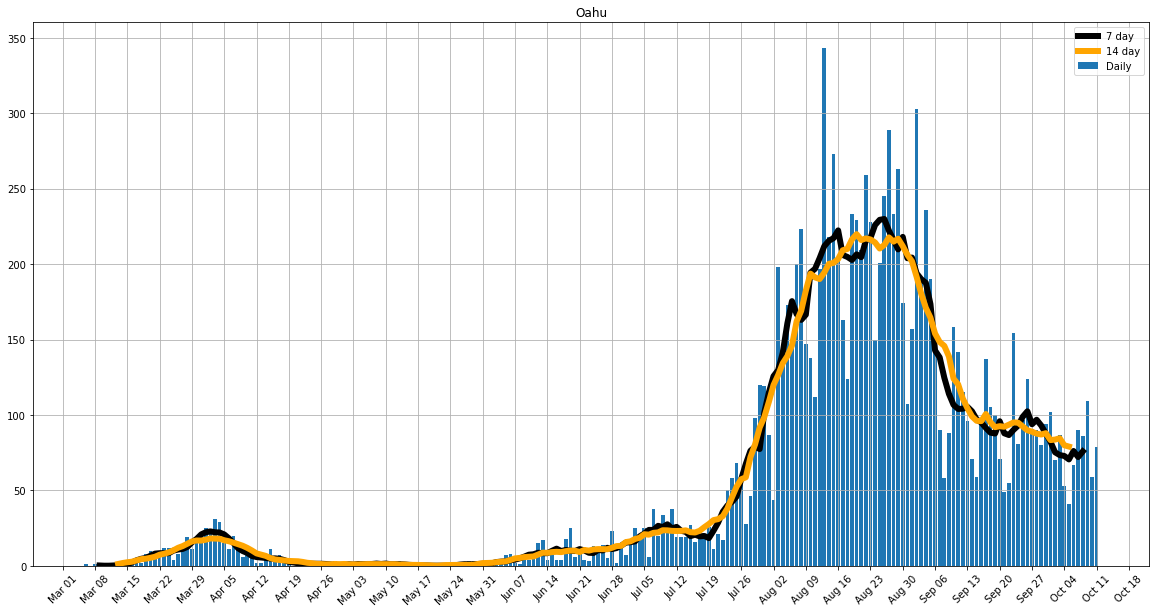

In [9]:
#plot data
fig, ax = plt.subplots(figsize=(20,10))
dSeries = df['Oahu']

ax.bar(df.index, dSeries, label="Daily")
#ax.plot(df.index, df['Oahu'].rolling(window=3).mean(), color='red', linewidth=3, label="3 day")
ax.plot(df.index, dSeries.rolling(window=7,center=True).mean(), color='black', linewidth=6, label="7 day")
ax.plot(df.index, dSeries.rolling(window=14,center=True).mean(), color='orange', linewidth=6, label="14 day")
#ax.plot(df.index, dSeries.ewm(span=7).mean(), color='red', linewidth=6, label="ewm")

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SU))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#rotate x axis labels
plt.xticks(rotation=45)
plt.title('Oahu')
#grid
ax.grid()
ax.legend();

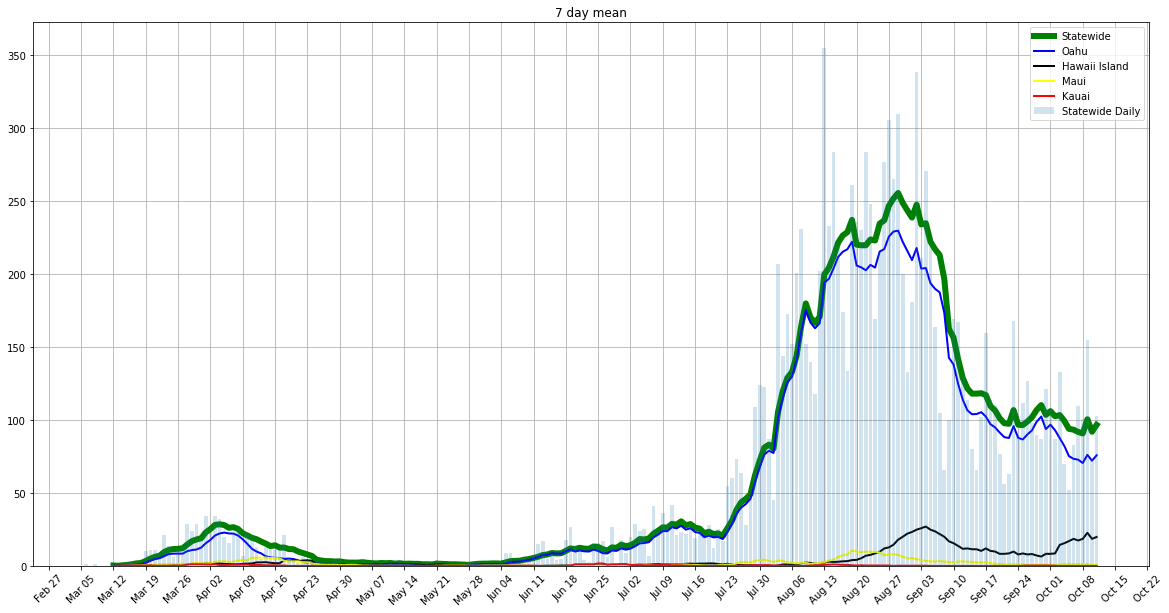

In [10]:
#plot all counties
fig, ax = plt.subplots(figsize=(20,10))

ax.bar(df.index, df['Statewide total'], label="Statewide Daily", alpha=0.2, zorder=10)
ax.plot(df.index, df['Statewide total'].rolling(7).mean(),color='green', linewidth=6, label="Statewide")
ax.plot(df.index, df['Oahu'].rolling(7).mean(), color='blue', linewidth=2, label="Oahu")
ax.plot(df.index, df['Hawaii island'].rolling(window=7).mean(), color='black', linewidth=2, label="Hawaii Island")
ax.plot(df.index, df['Maui'].rolling(window=7).mean(), color='yellow', linewidth=2, label="Maui")
ax.plot(df.index, df['Kauai'].rolling(window=7).mean(), color='red', linewidth=2, label="Kauai")
#not showing "Outsied Hawaii"

ax.set_ylim(ymin=0)

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.TH))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#rotate x axis labels
plt.xticks(rotation=45)
plt.title('7 day mean')
#grid
ax.grid()
ax.legend();
#fig.savefig('publish/means.png');

In [11]:
#fig = df.rolling(window=7).mean().plot(figsize=(20,10), grid='on',title='7 day mean').get_figure();
#fig.savefig('publish/means.png')

In [12]:
popOahu = 974563 / 10000
popMolokai = 7345 /10000
popHawaii = 201513 /10000
popMaui = 144444 /10000
popLanai = 3135 /10000
popKauai = 72293 /10000

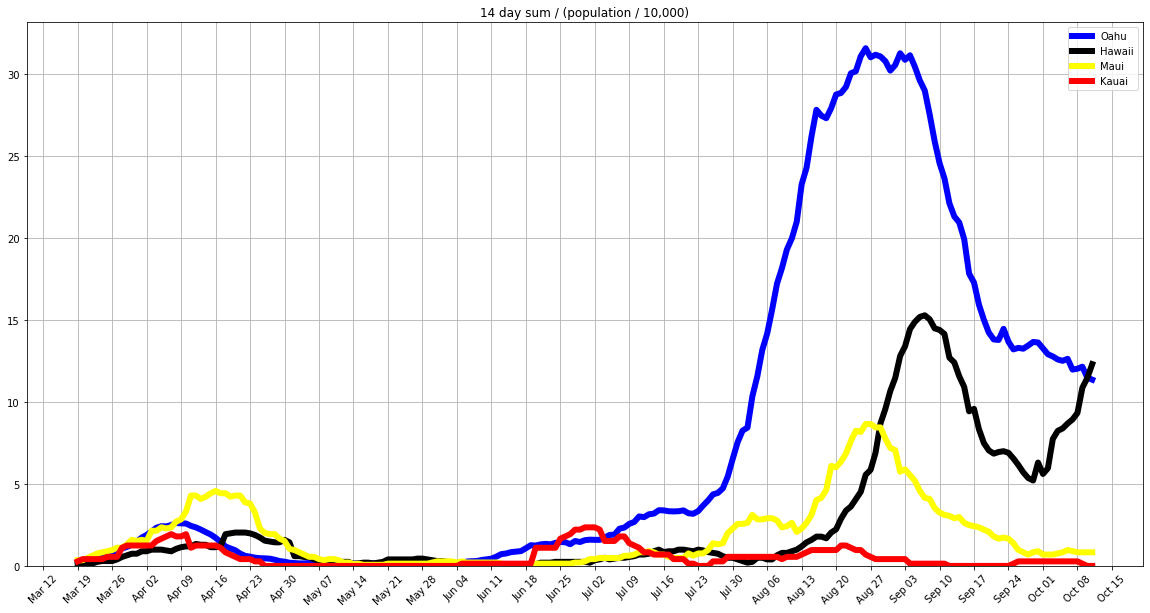

In [13]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(df.index, df['Oahu'].rolling(window=14).sum() / popOahu, color='blue', linewidth=6, label="Oahu")
#ax.plot(df.index, df['Molokai'].rolling(window=14).sum() / popMolokai, color='green', linewidth=6, label="Molokai")
ax.plot(df.index, df['Hawaii island'].rolling(window=14).sum() / popHawaii, color='black', linewidth=6, label="Hawaii")
ax.plot(df.index, df['Maui'].rolling(window=14).sum() / popMaui, color='yellow', linewidth=6, label="Maui")
ax.plot(df.index, df['Kauai'].rolling(window=14).sum() / popKauai, color='red', linewidth=6, label="Kauai")

ax.set_ylim(ymin=0)

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.TH))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#rotate x axis labels
plt.xticks(rotation=45)
#grid
ax.grid()
plt.title('14 day sum / (population / 10,000)')
ax.legend();
#fig.savefig('publish/population14day.png');

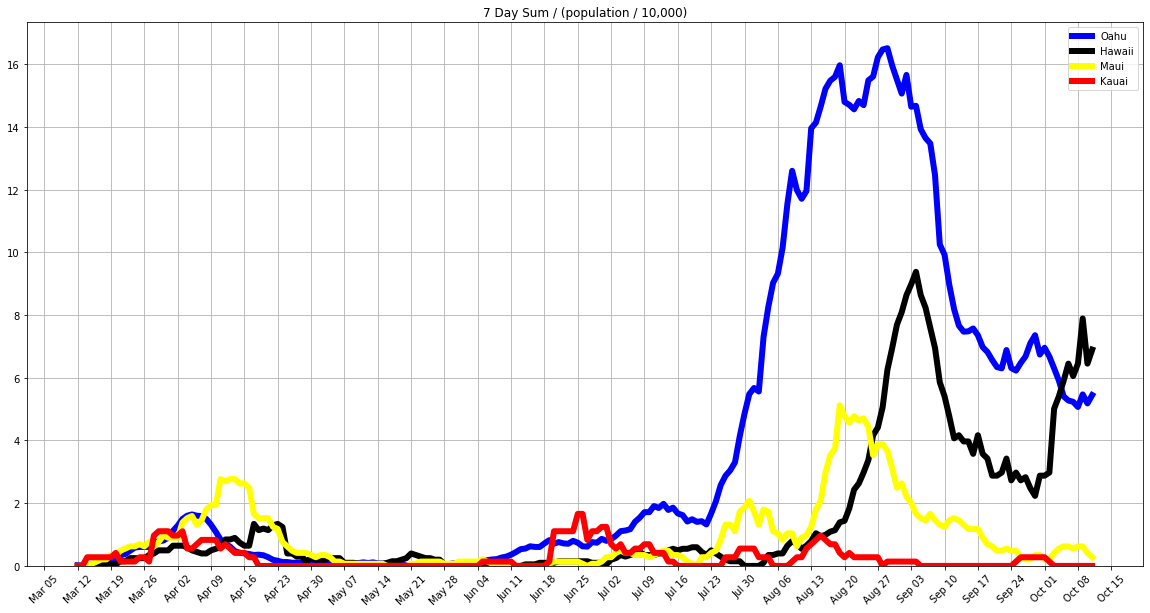

In [14]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(df.index, df['Oahu'].rolling(window=7).sum() / popOahu, color='blue', linewidth=6, label="Oahu")
ax.plot(df.index, df['Hawaii island'].rolling(window=7).sum() / popHawaii, color='black', linewidth=6, label="Hawaii")
ax.plot(df.index, df['Maui'].rolling(window=7).sum() / popMaui, color='yellow', linewidth=6, label="Maui")
ax.plot(df.index, df['Kauai'].rolling(window=7).sum() / popKauai, color='red', linewidth=6, label="Kauai")

ax.set_ylim(ymin=0)

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.TH))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#rotate x axis labels
plt.xticks(rotation=45)
#grid
ax.grid()
plt.title('7 Day Sum / (population / 10,000)')
ax.legend();
#fig.savefig('publish/population7Day.png');

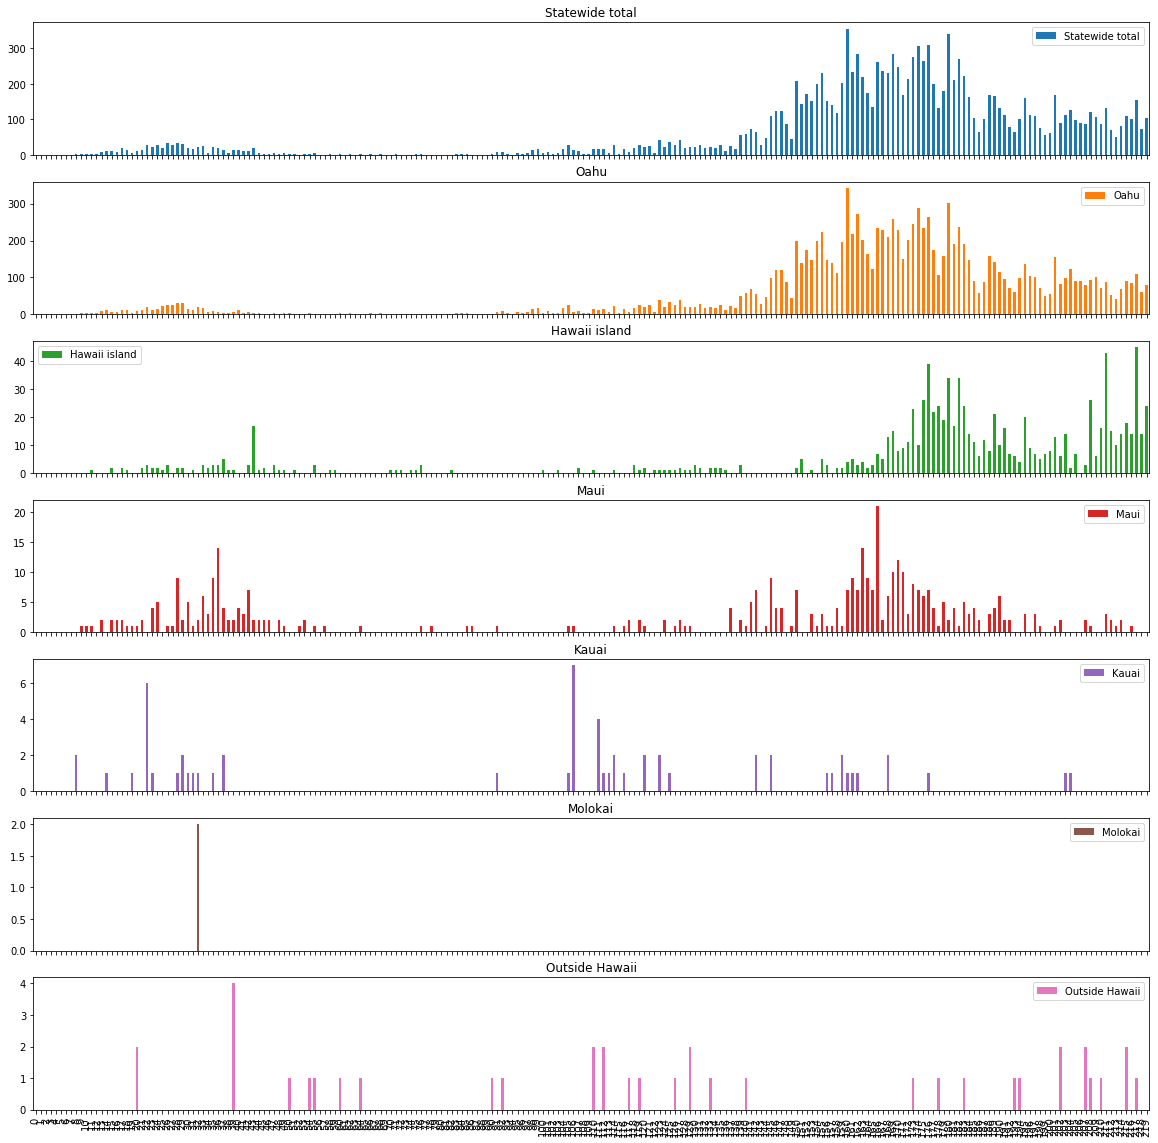

In [15]:
#df.plot(subplots=True, figsize=(20,20), sharey=True, kind='bar', use_index=False);
df.plot(subplots=True, figsize=(20,20), kind='bar', use_index=False);
#df.plot(subplots=True, figsize=(20,20), sharey=True, kind='area', use_index=True);

# Projection  
Simple rate from short term v long term rolling mean

In [16]:
st = 7        # short term
lt = 14       # long term
daysOut = 30  #number of days to project out
dSeries = df["Oahu"]

#R = dSeries.rolling(window=st).mean().tail(3).mean() / dSeries.rolling(window=lt).mean().tail(3).mean()

#set R to average of slope of lt and st series
#R = ((dSeries.rolling(window = st).mean().iloc[-1] / dSeries.rolling(window = st).mean().iloc[-2]) +
#    (dSeries.rolling(window = lt).mean().iloc[-1] / dSeries.rolling(window = lt).mean().iloc[-2])) /2 

#set R to average of the lt and st slopes for the last st periods
dSt = dSeries.rolling(window = st).mean().tail(st)
dLt = dSeries.rolling(window = lt).mean().tail(st)
R = 0.0
Rlt = 0.0
for i in range(len(dSt)-1):
    R = R + (dSt[i+1] / dSt[i])
    Rlt = Rlt +(dLt[i+1] / dLt[i])
    
Rlt = Rlt / (len(dSt)-1)
#average of short term and long term
#R = ((R / (len(dSt)-1)) + Rlt) / 2
#just short term
R = R / (len(dSt)-1)
#just long term
#R= Rlt



#R = dSeries.tail(st).mean()/dSeries.tail(lt).mean()
D = df.index.values[-1]
Starting = dSeries.tail(st).mean()
dates = pd.date_range(D+np.timedelta64(1, "D"), periods=daysOut, freq='D')

#values = [int(round(R*Starting))]
#start from the mid point of the mean. ie the rate to the power half the number of days in the mean.
values = [pow(R,len(dSt)/2)*Starting]
#start projecting the trend onto the mean from the first day of the period -- presumably better for established trend
#values = [pow(R,len(dSt))*Starting]
for i in range(1,daysOut):
  #values.append(int(round(values[i-1]*R)))
  values.append(values[i-1]*R)

#if intergers are better:    
#for i in range(len(values)):
#  values[i] = int(round(values[i]))

data = pd.DataFrame(list(values), index=dates)

data = dSeries.append(data)

In [17]:
R

1.0023461836732566

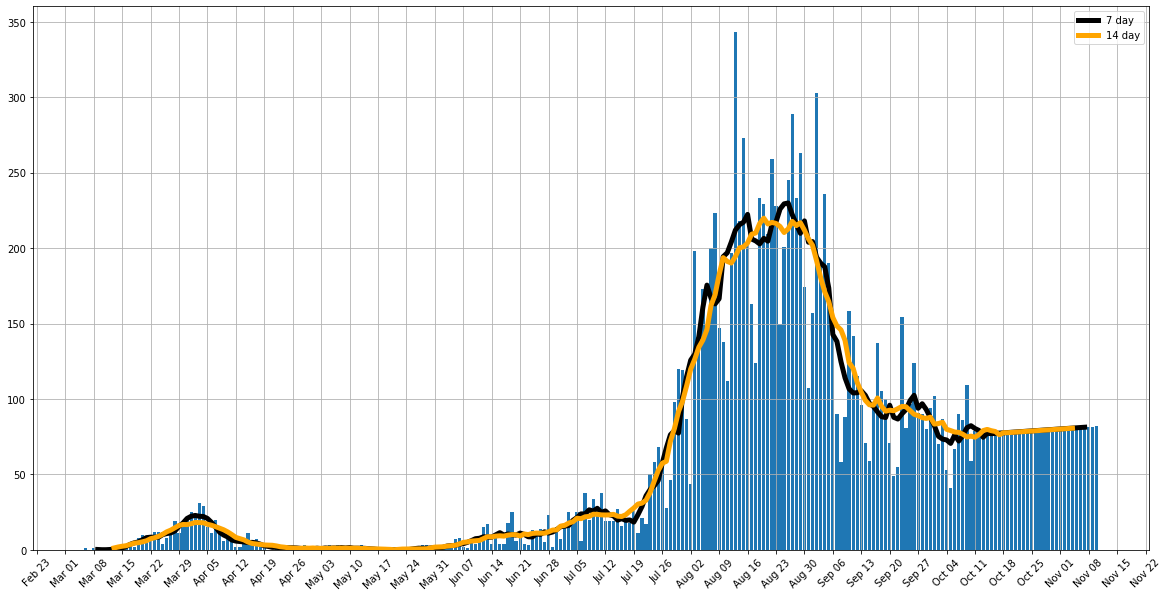

In [18]:
fig, ax = plt.subplots(figsize=(20,10))

ax.bar(data.index, data[0])
#ax.plot(data.index, data[0].ewm(span=14, adjust = False).mean(), color='k')
ax.plot(data.index, data[0].rolling(window=7, center=True).mean(), color='black', linewidth=5, label='7 day')
ax.plot(data.index,data[0].rolling(window=14, center=True).mean(), color='orange', linewidth=5,label='14 day')

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SU))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#rotate x axis labels
plt.xticks(rotation=45)

#grid
ax.grid() 
ax.legend();

In [19]:
data.tail(31)

,0
2020-10-11,79.000000
2020-10-12,76.481884
2020-10-13,76.661324
2020-10-14,76.841186
2020-10-15,77.021469
2020-10-16,77.202176
2020-10-17,77.383306
2020-10-18,77.564862
2020-10-19,77.746843
2020-10-20,77.929251


In [20]:
rpt_date = '2020-10-10'

In [21]:
data["2020-8-30":rpt_date].rolling(window = 3).std().mean()

0    29.386851
dtype: float64

In [22]:
data["mean"] = data[0].rolling(7).mean()
data["std"] = data[0].rolling(7).std()
data["rolling std"] = data["std"].rolling(7).mean()
#data["diff"] = abs(data[0] - data["mean"])
data["diff"] = (data[0] - data["mean"]) 
data["rolling diff"] = data["diff"].rolling(7).mean()
data["diff pct std"] = data["diff"] / data["std"]
data["rolling diff pct std"] = data["diff pct std"].rolling(7).mean()

In [23]:
data["2020-9-10" : rpt_date]

,0,mean,std,rolling std,diff,rolling diff,diff pct std,rolling diff pct std
2020-09-10,158.0,138.142857,63.236141,67.772367,19.857143,-37.571429,0.314016,-0.512041
2020-09-11,142.0,124.714286,46.849811,64.878602,17.285714,-39.632653,0.368960,-0.526846
2020-09-12,115.0,114.000000,36.963946,61.311464,1.000000,-38.938776,0.027053,-0.514085
2020-09-13,96.0,106.714286,34.306046,57.044207,-10.714286,-34.326531,-0.312315,-0.462983
2020-09-14,71.0,104.000000,36.528528,52.541682,-33.000000,-25.102041,-0.903404,-0.387198
2020-09-15,59.0,104.142857,36.320006,45.744476,-45.142857,-15.061224,-1.242920,-0.368218
2020-09-16,97.0,105.428571,35.809017,41.430499,-8.428571,-8.448980,-0.235376,-0.283426
2020-09-17,137.0,102.428571,31.261569,36.862703,34.571429,-6.346939,1.105876,-0.170303
2020-09-18,105.0,97.142857,26.168866,33.908283,7.857143,-7.693878,0.300248,-0.180119
2020-09-19,100.0,95.000000,25.053277,32.206758,5.000000,-7.122449,0.199575,-0.155474


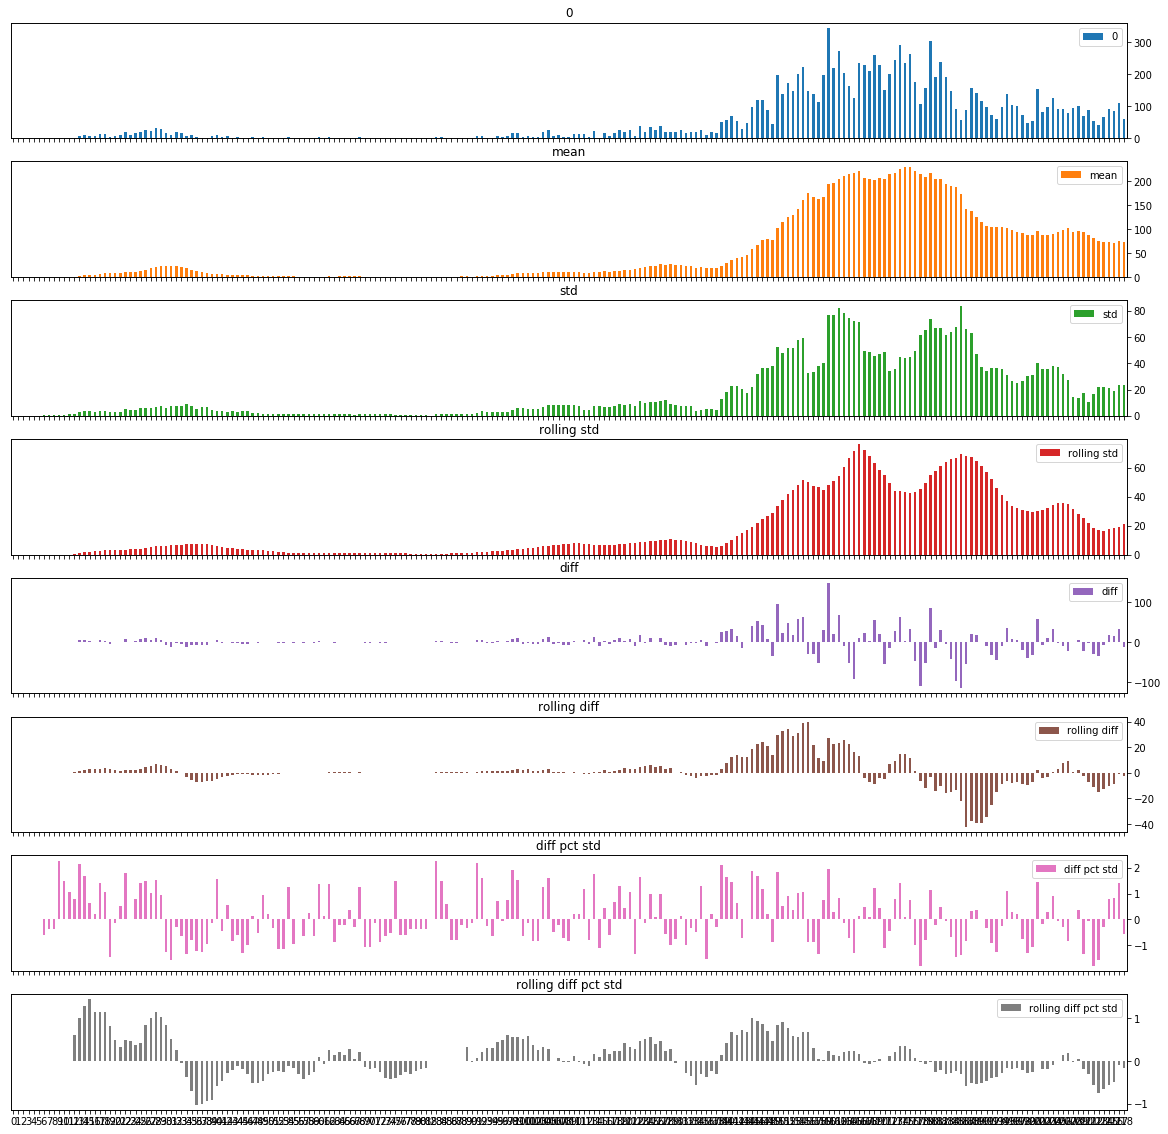

In [24]:
data[:rpt_date].plot(figsize=(20,20), subplots = True, kind ='bar', use_index = False, secondary_y= True);

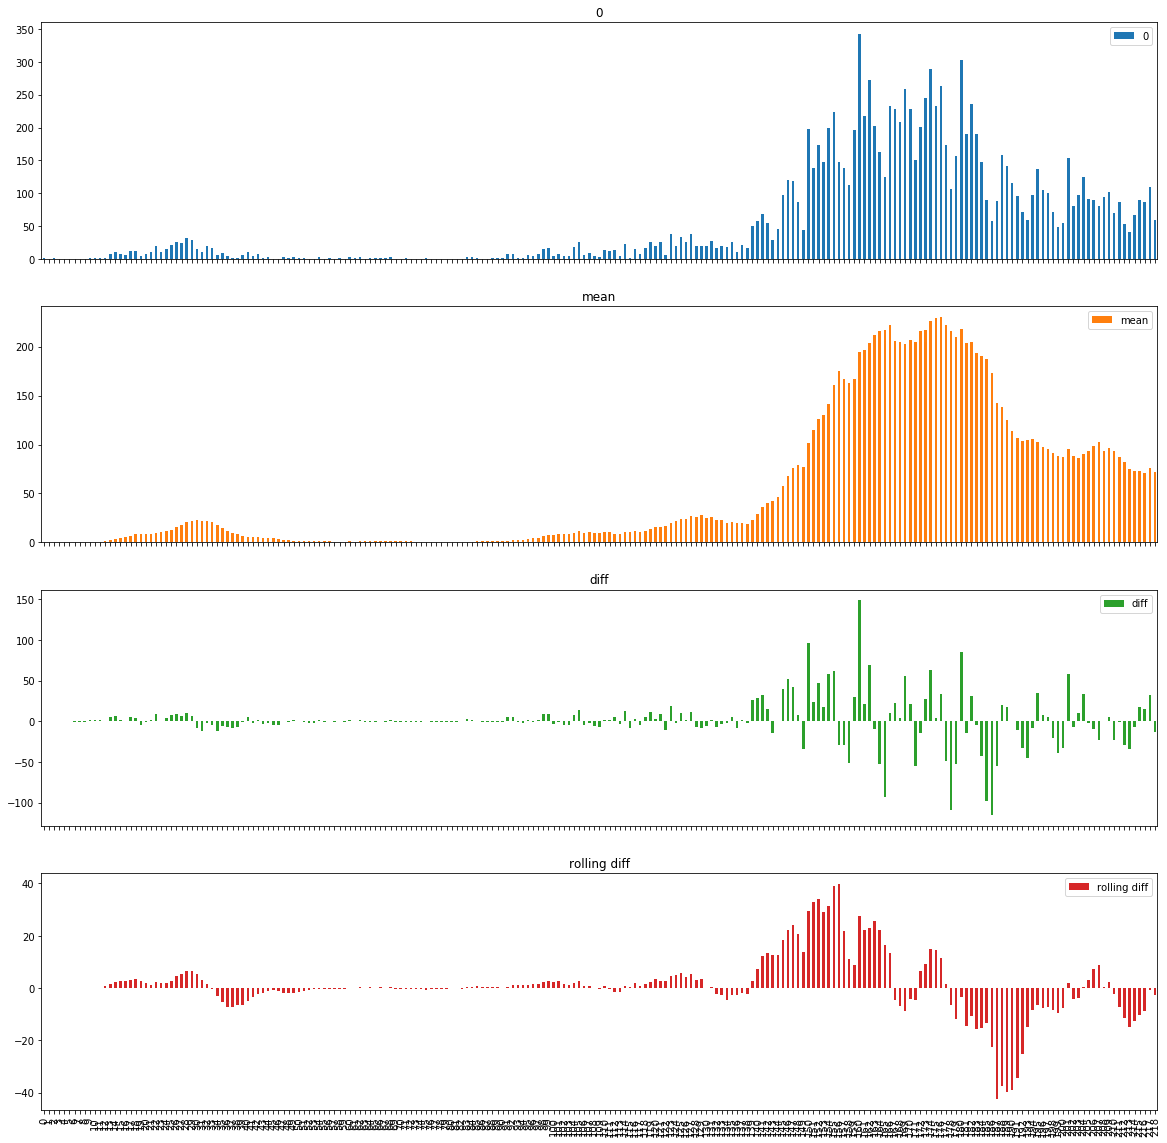

In [25]:
data.loc[:rpt_date,[0,"mean","diff","rolling diff"]].plot(figsize=(20,20), subplots = True, kind ='bar', use_index = False);

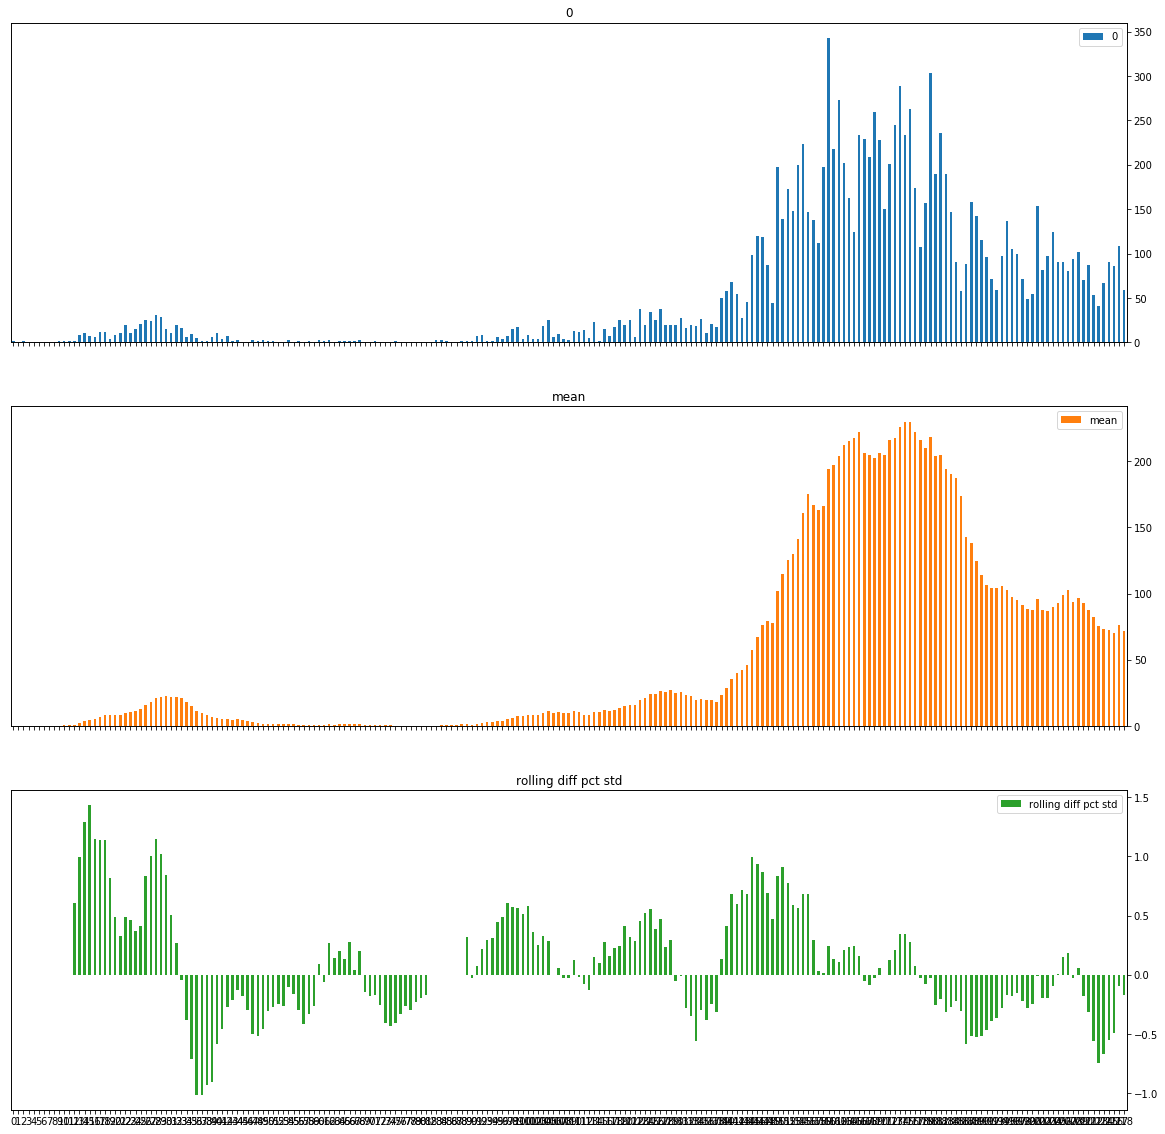

In [26]:
data.loc[:rpt_date,[0,"mean","rolling diff pct std"]].plot(figsize=(20,20), subplots = True, kind ='bar', use_index = False, secondary_y= True);

In [27]:
#data.loc[:rpt_date,["std"]].rolling(3).mean().plot(figsize=(20,20), grid = "on");

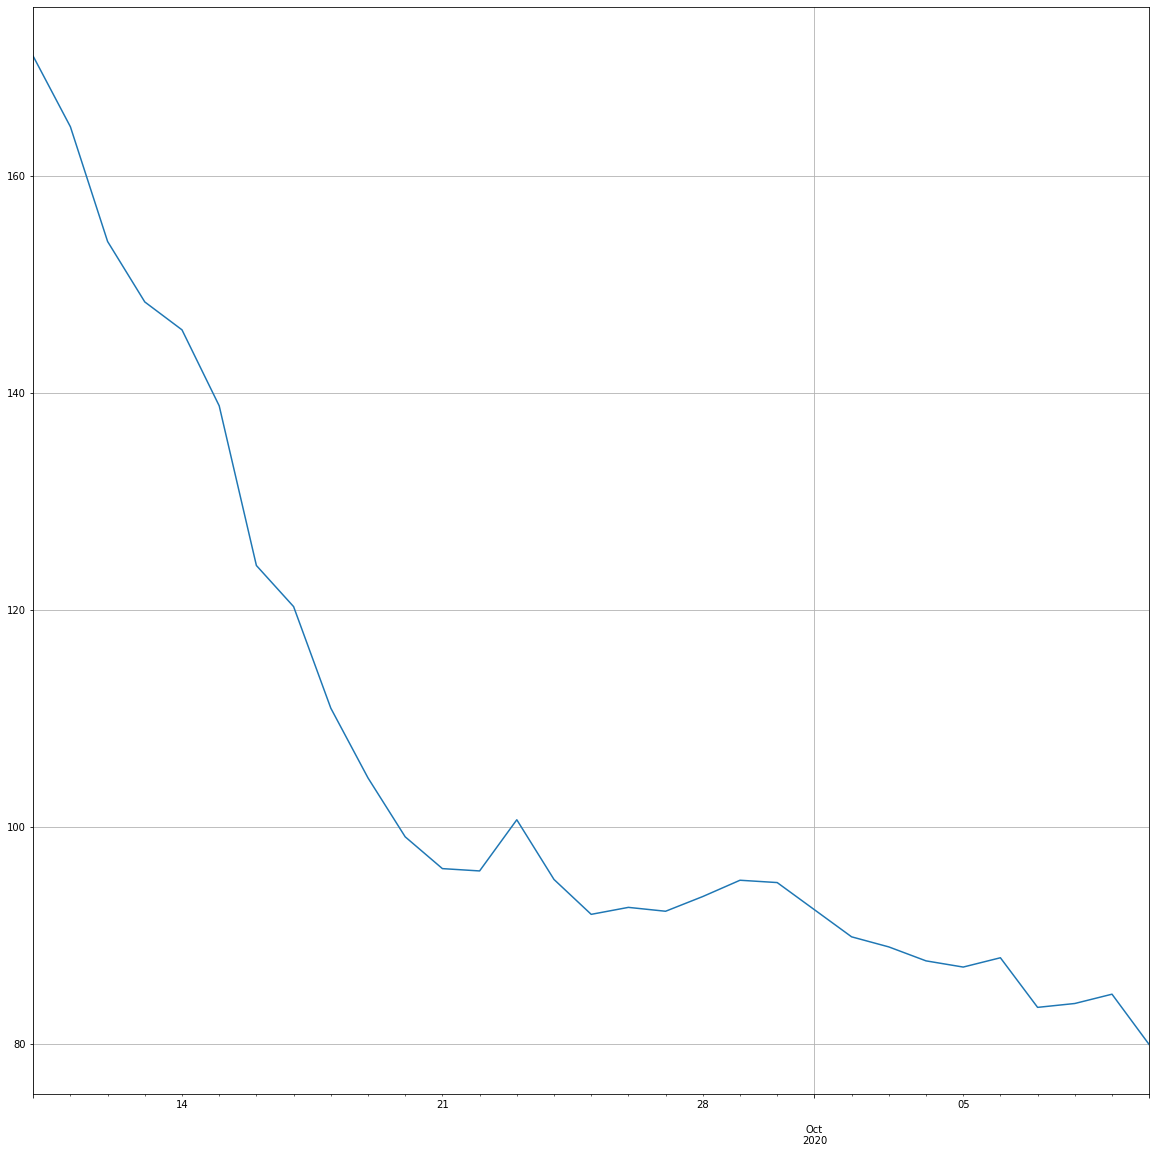

In [28]:
data.loc[:rpt_date,0].rolling(14).mean().tail(31).plot(figsize=(20,20), grid = "on");

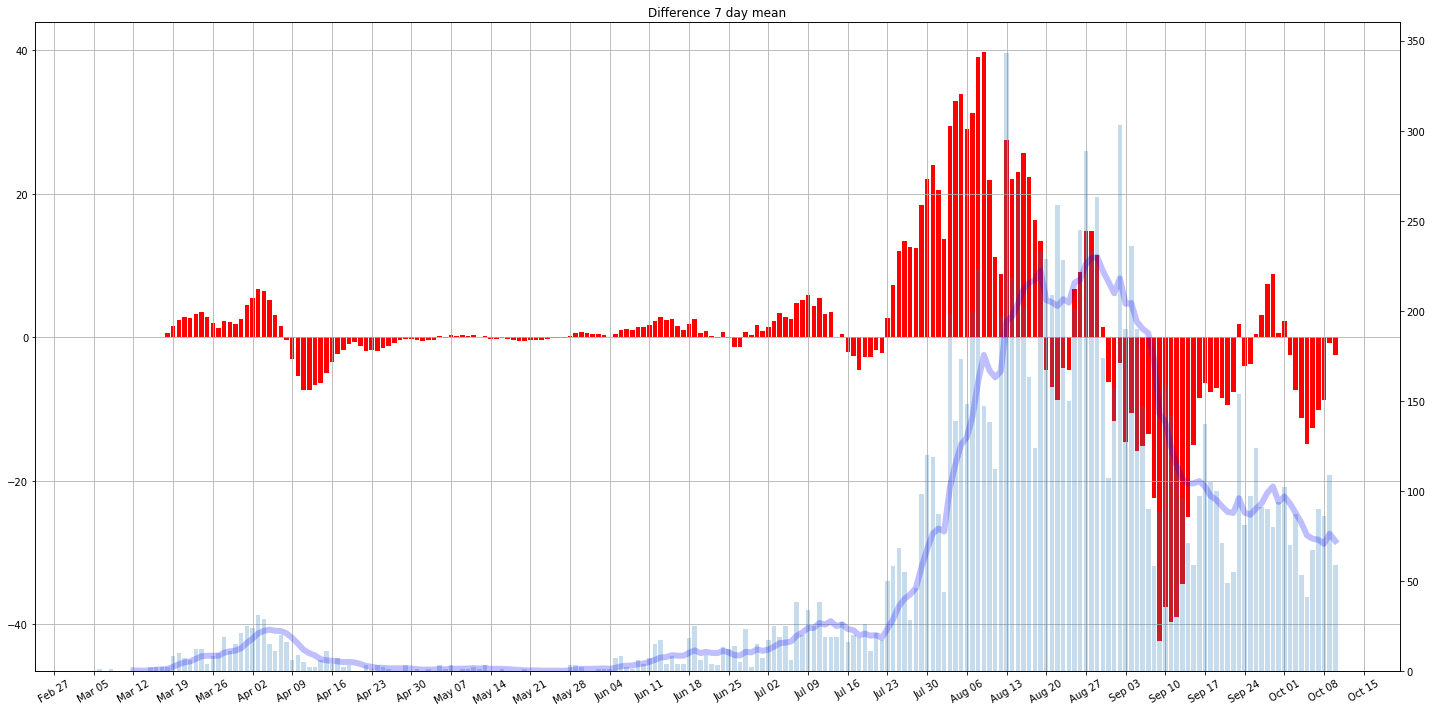

In [29]:
#plot mean and std diff
#data.loc[:rpt_date,[0,"mean","rolling diff pct std"]].plot(figsize=(20,20), subplots = True, kind ='bar', use_index = False, secondary_y= True);
dfPlot = data.loc[:rpt_date]

fig, ax = plt.subplots(figsize=(20,10))

ax1 = ax.twinx()  

ax1.plot(dfPlot.index, dfPlot['mean'],color='blue', linewidth=6, zorder=10, alpha =0.25, label="7 day mean")
ax1.bar(dfPlot.index, dfPlot[0],alpha=0.25)
ax.bar(dfPlot.index, dfPlot['rolling diff'],color='red', label="7 day std diff")                                                        


ax1.set_ylim(ymin=0)

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.TH))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#rotate x axis labels
#plt.xticks(rotation=45)
ax.tick_params(axis='x', labelrotation=30)
plt.title('Difference 7 day mean')
#grid
ax.grid()
#ax.legend();
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show();

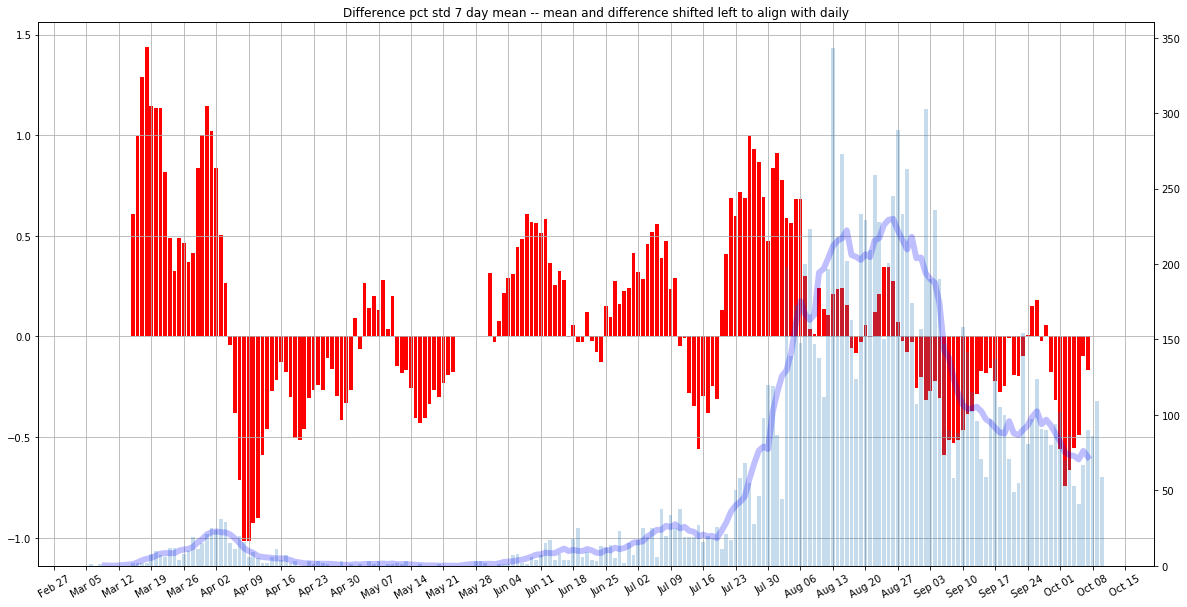

In [30]:
#plot mean and std diff
#data.loc[:rpt_date,[0,"mean","rolling diff pct std"]].plot(figsize=(20,20), subplots = True, kind ='bar', use_index = False, secondary_y= True);
dfPlot = data.loc[:rpt_date]

fig, ax = plt.subplots(figsize=(20,10))

ax1 = ax.twinx()  

ax1.plot(dfPlot.index, dfPlot['mean'].shift(-3),color='blue', linewidth=6, zorder=10, alpha =0.25, label="7 day mean")
ax1.bar(dfPlot.index, dfPlot[0],alpha=0.25)
ax.bar(dfPlot.index, dfPlot['rolling diff pct std'].shift(-3),color='red', label="7 day std diff")                                                        


ax1.set_ylim(ymin=0)

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.TH))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

#rotate x axis labels
#plt.xticks(rotation=45)
ax.tick_params(axis='x', labelrotation=30)
plt.title('Difference pct std 7 day mean -- mean and difference shifted left to align with daily')
#grid
ax.grid();
#ax.legend();
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
#fig.savefig('publish/rfSignal.png');